## Predicting Bigg Boss Kannada (ಬಿಗ್ ಬಾಸ್ ಕನ್ನಡ) Season 8 Winner





In [128]:
import datetime
print("Notebook was last executed on:", datetime.date.today())

Notebook was last executed on: 2021-04-27


### Importing Required Python Libraries

In [129]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

### Check and import dataset

In [130]:
bigg_boss = pd.read_csv('/kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada/Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 671 rows and 24 columns


## Exploratory Data Analysis (EDA)

In [131]:
bigg_boss.head(5)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,03-Nov-06,NaN,10.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0,0.0
1,Hindi,1,Anupama Verma,Model,Female,03-Nov-06,NaN,5.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,03-Nov-06,NaN,4.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,03-Nov-06,NaN,1.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
4,Hindi,1,Carol Gracias,Model,Female,03-Nov-06,26-Jan-07,12.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,6.0,0.0,0.0,NaN,1.0,0.0


In [132]:
bigg_boss.tail(10).T

,661,662,663,664,665,666,667,668,669,670
Language,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam
Season Number,3,3,3,3,3,3,3,3,3,3
Name,Ramzan Muhammed,Rithu Manthra,Sai Vishnu,Sandhya Manoj,Soorya Menon,Firoz Khan,Sajna Firoz,Michelle Ann Daniel,Angel Thomas,Remya Panickar
Profession,Dancer,Singer,Commoner,Dancer,Model,Actor,Soap Actress,Actress,Model,Actress
Gender,Male,Female,Male,Female,Female,Male,Female,Female,Female,Female
Entry Date,14-Feb-21,14-Feb-21,14-Feb-21,14-Feb-21,14-Feb-21,NaN,NaN,NaN,NaN,NaN
Elimination Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,NaN,NaN,NaN,10,NaN,9,9,3,4,NaN
Wild Card,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes
Season Length,105,105,105,105,105,105,105,105,105,105


In [133]:
bigg_boss.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
600,Bengali,2,Mainak Banerjee,Actor,Male,04-Apr-16,NaN,NaN,No,97,16,04-Apr-16,15-Jul-16,Mithun Chakraborthy,NaN,0,Colors Bangla,6.50,2.0,0.0,0.0,NaN,0.0,0.0
18,Hindi,2,Elina Wadiwala,Model,Female,17-Aug-08,NaN,5.0,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,NaN,0,Colors,2.89,2.0,0.0,0.0,NaN,0.0,0.0
228,Hindi,13,Tehseen Poonawalla,Political Analyst,Male,NaN,NaN,6.0,Yes,140,22,29-Sep-19,15-Feb-20,Salman Khan,NaN,0,Colors,9.06,1.0,0.0,0.0,NaN,0.0,0.0
348,Kannada,6,AV Ravi,Actor,Male,21-Oct-18,NaN,5.0,No,100,20,21-Oct-18,27-Jan-19,Sudeep,NaN,0,Colors Kannada,NaN,3.0,0.0,1.0,NaN,0.0,0.0
20,Hindi,2,Ketaki Dave,Soap Actress,Female,17-Aug-08,NaN,4.0,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,NaN,0,Colors,2.89,1.0,0.0,0.0,NaN,0.0,0.0
5,Hindi,1,Deepak Parashar,Actor,Male,03-Nov-06,NaN,2.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
552,Marathi,1,Rajesh Shringarpure,Actor,Male,15-Apr-18,NaN,5.0,No,98,18,15-Apr-18,22-Jul-18,Mahesh Manjrekar,NaN,0,Colors Marathi,NaN,2.0,0.0,0.0,NaN,0.0,0.0
321,Kannada,4,Omprakash Rao,Film Director,Male,NaN,NaN,NaN,Yes,112,18,09-Oct-16,29-Jan-17,Sudeep,NaN,0,Colors Kannada,NaN,NaN,NaN,NaN,NaN,0.0,0.0
557,Marathi,1,Sushant Shelar,Actor,Male,15-Apr-18,NaN,8.0,No,98,18,15-Apr-18,22-Jul-18,Mahesh Manjrekar,NaN,0,Colors Marathi,NaN,5.0,0.0,1.0,NaN,0.0,0.0
441,Telugu,3,Hema,Actress,Female,21-Jul-19,28-Jul-19,1.0,No,105,17,21-Jul-19,03-Nov-19,Nagarjuna,Ramya Krishnan,0,Star Maa,NaN,1.0,0.0,0.0,NaN,0.0,0.0


In [134]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 24 columns):
Language                              671 non-null object
Season Number                         671 non-null int64
Name                                  671 non-null object
Profession                            671 non-null object
Gender                                671 non-null object
Entry Date                            564 non-null object
Elimination Date                      134 non-null object
Elimination Week Number               548 non-null float64
Wild Card                             671 non-null object
Season Length                         671 non-null int64
Number of Housemates                  671 non-null int64
Season Start Date                     671 non-null object
Season End Date                       671 non-null object
Host Name                             671 non-null object
Guest Host Name                       73 non-null object
Prize Money (INR)           

In [135]:
bigg_boss.describe()

,Season Number,Elimination Week Number,Season Length,Number of Housemates,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
count,671.000000,548.000000,671.000000,671.000000,394.000000,653.000000,653.000000,638.000000,86.000000,648.000000,648.000000
mean,4.946349,9.171533,102.588674,18.374069,6.230635,4.039816,0.098009,0.534483,6.593023,0.236111,0.052469
std,3.771865,4.833210,13.667833,2.090886,3.329713,2.899377,0.322299,0.754621,1.618844,0.425019,0.223143
min,1.000000,1.000000,70.000000,15.000000,2.720000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.000000,5.000000,98.000000,17.000000,3.770000,2.000000,0.000000,0.000000,5.250000,0.000000,0.000000
50%,4.000000,9.000000,105.000000,18.000000,4.950000,3.000000,0.000000,0.000000,7.000000,0.000000,0.000000
75%,7.000000,14.000000,105.000000,20.000000,8.200000,6.000000,0.000000,1.000000,8.000000,0.000000,0.000000
max,14.000000,20.000000,143.000000,23.000000,15.600000,17.000000,3.000000,5.000000,10.000000,1.000000,1.000000


In [136]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [137]:
bigg_boss['Finalist'] = bigg_boss['Finalist'].astype(pd.Int32Dtype())
bigg_boss['Elimination Week Number'] = bigg_boss['Elimination Week Number'].astype(pd.Int32Dtype())
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].astype(pd.Int32Dtype())
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].astype(pd.Int32Dtype())
bigg_boss['Number of times elected as Captain'] = bigg_boss['Number of times elected as Captain'].astype(pd.Int32Dtype())
bigg_boss['Social Media Popularity'] = bigg_boss['Social Media Popularity'].astype(pd.Int32Dtype())

bigg_boss['Prize Money (INR)'] = bigg_boss['Prize Money (INR)'].str.replace(',','')
bigg_boss['Prize Money (INR)'] = pd.to_numeric(bigg_boss['Prize Money (INR)'])

bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 24 columns):
Language                              671 non-null object
Season Number                         671 non-null int64
Name                                  671 non-null object
Profession                            671 non-null object
Gender                                671 non-null object
Entry Date                            564 non-null datetime64[ns]
Elimination Date                      134 non-null datetime64[ns]
Elimination Week Number               548 non-null Int32
Wild Card                             671 non-null object
Season Length                         671 non-null int64
Number of Housemates                  671 non-null int64
Season Start Date                     671 non-null datetime64[ns]
Season End Date                       671 non-null datetime64[ns]
Host Name                             671 non-null object
Guest Host Name                       73 non-null objec

In [138]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 14
Number of unique values in Name - 664
Number of unique values in Profession - 75
Number of unique values in Gender - 3
Number of unique values in Entry Date - 46
Number of unique values in Elimination Date - 75
Number of unique values in Elimination Week Number - 20
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 15
Number of unique values in Number of Housemates - 8
Number of unique values in Season Start Date - 37
Number of unique values in Season End Date - 35
Number of unique values in Host Name - 12
Number of unique values in Guest Host Name - 4
Number of unique values in Prize Money (INR) - 9
Number of unique values in Broadcasted By - 11
Number of unique values in Average TRP - 21
Number of unique values in Number of Evictions Faced - 16
Number of unique values in Number of re-entries - 4
Number of unique values in Number of times elected as Captain - 6
Numbe

In [139]:
# Number of seasons in all Indian languages
print(bigg_boss.groupby('Language')['Season Number'].nunique().sum())

# 37 seasons happened (including current seasons)

37


## Dataset https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

## Bigg Boss Hindi has many seasons compared to other Indian languages. So, number of housemates are more in Hindi.

In [140]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi        14
Kannada       8
Tamil         4
Telugu        4
Malayalam     3
Bengali       2
Marathi       2
Name: Season Number, dtype: int64


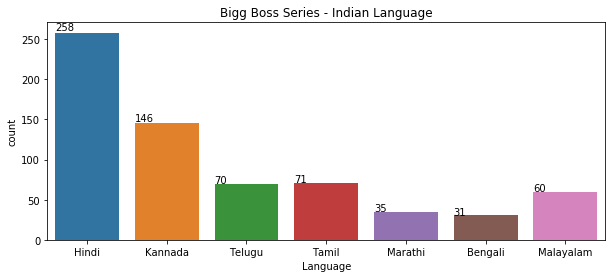

In [141]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## In Bigg Boss India seasons, most of the housemates entered in first day/week

No     553
Yes    118
Name: Wild Card, dtype: int64 

No     82.0
Yes    18.0
Name: Wild Card, dtype: float64


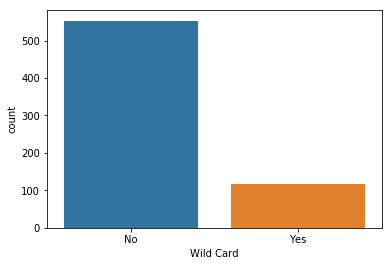

In [142]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100))
sns.countplot(x='Wild Card', data=bigg_boss)

In [143]:
# Common people has many professions, so clubbing them into one category
bigg_boss['Profession'] = bigg_boss['Profession'].fillna('UNKNOWN')
bigg_boss.loc[bigg_boss['Profession'].str.contains('Commoner'),'Profession']='Commoner'

## Number of film actress entered into the Bigg Boss houses, are more when compared to other professions 

Actress                  155
Actor                    110
Model                     51
Soap Actress              49
Commoner                  40
Singer                    40
Soap Actor                29
TV Anchor                 21
Reality Show Alumni       17
Comedian                  16
Social Media Star         14
Radio Jockey              14
News Presenter            13
Sports Person              9
Choreographer              8
Film Director              8
Activist                   6
International Star         6
Politician                 5
Producer                   5
Dancer                     4
Pageant Winner             4
Swamiji                    4
Controversial Fame         4
Video Jockey               4
LGBT                       4
Wrestler                   3
Fashion Designer           2
Businessman                2
Journalist                 2
Musician                   2
Stage Actress              2
Air Hostess                1
Writer                     1
Theatre Artist

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

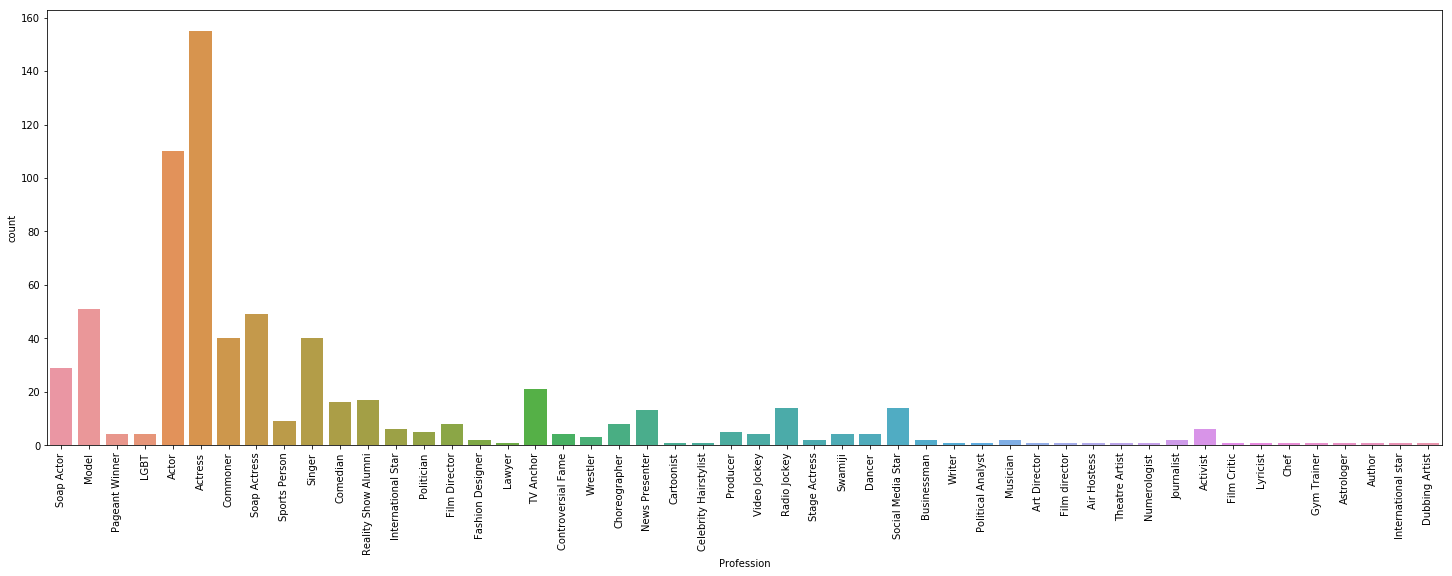

In [144]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(25,8))
sns.countplot(x='Profession', data=bigg_boss)
plt.xticks(rotation=90)

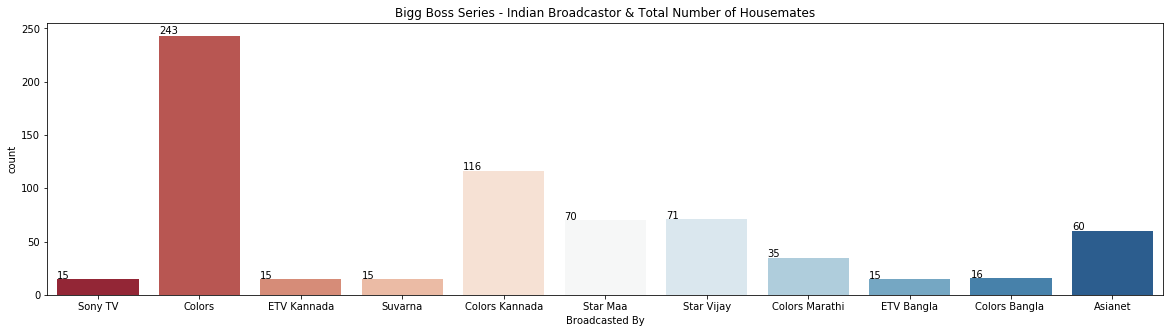

In [145]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

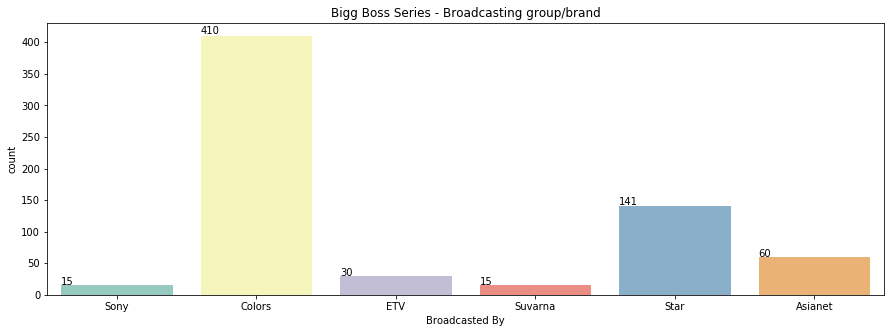

In [146]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(bigg_boss['Broadcasted By'].str.split().str.get(0), data=bigg_boss, palette='Set3')
ax.set_title('Bigg Boss Series - Broadcasting group/brand')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## Salman Khan hosted most number of seasons (in Bigg Boss Hindi), Sudeep is next on the list

In [147]:
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan            11
Sudeep                  8
Kamal Haasan            4
Mohanlal                3
Mahesh Manjrekar        2
Mithun Chakraborthy     2
Nagarjuna               2
Amitabh Bachchan        1
Arshad Warsi            1
Jr. NTR                 1
Nani                    1
Shilpa Shetty           1
Name: Season Number, dtype: int64

In [148]:
# Temporary or Guest host who hosted the week-end episodes
bigg_boss.groupby('Guest Host Name')['Season Number'].nunique().nlargest(10)

Guest Host Name
Farah Khan           1
Ramya Krishnan       1
Samantha Akkineni    1
Sanjay Dutt          1
Name: Season Number, dtype: int64

## In all Bigg Boss languages, and in all seasons, Female contestants are more

In [149]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts(), "\n")

# In percentage
print(round(bigg_boss['Gender'].value_counts(normalize=True)*100).astype(int), "\n")

Female         353
Male           314
Transgender      4
Name: Gender, dtype: int64 

Female         53
Male           47
Transgender     1
Name: Gender, dtype: int64 



### Only 4 Transgenders (LGBT) participated in all Indian languages

In [150]:
# Maximum TRP of Bigg Boss India seasons
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 15.6 

Language  Season Number
   Tamil              4


In [151]:
# Longest season of Bigg Boss India seasons
print("Longest season",bigg_boss['Season Length'].max(), "days \n")
print(bigg_boss.loc[bigg_boss['Season Length']==bigg_boss['Season Length'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Longest season 143 days 

Language  Season Number
   Hindi             14


In [152]:
# 116 contestants entered via wild card, but 9 managed to go to Finale
bigg_boss.loc[(bigg_boss['Wild Card']=='Yes') & (bigg_boss['Finalist']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
44,Hindi,3,Pravesh Rana,Model,Male,NaT,NaT,12,Yes,84,15,2009-10-04,2009-12-26,Amitabh Bachchan,NaN,0.0,Colors,2.83,4,0,0,NaN,1,0.0
59,Hindi,4,Dalip Singh Rana (Khali),Wrestler,Male,NaT,2011-01-08,14,Yes,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,0.0,Colors,4.95,2,0,2,NaN,1,0.0
60,Hindi,4,Dolly Bindra,Actress,Female,NaT,2011-01-08,14,Yes,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,0.0,Colors,4.95,4,0,1,NaN,1,0.0
75,Hindi,5,Amar Upadhyay,Actor,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,7,0,1,NaN,1,0.0
76,Hindi,5,Siddharth Bhardwaj,Reality Show Alumni,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,5,0,0,NaN,1,0.0
77,Hindi,5,Akashdeep Saigal,Actor,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,5,0,1,NaN,1,0.0
96,Hindi,6,Imam Siddique,Reality Show Alumni,Male,NaT,2013-01-12,14,Yes,97,19,2012-10-07,2013-01-12,Salman Khan,NaN,0.0,Colors,3.81,6,1,1,NaN,1,0.0
115,Hindi,7,Ajaz Khan,Actor,Male,NaT,2013-12-28,15,Yes,105,20,2013-09-15,2013-12-28,Salman Khan,NaN,0.0,Colors,4.40,7,0,0,NaN,1,0.0
133,Hindi,8,Ali Quli Mirza,Singer,Male,NaT,2015-01-03,15,Yes,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,0.0,Colors,3.77,6,0,1,NaN,1,0.0
135,Hindi,8,Dimpy Ganguly,TV Anchor,Female,NaT,2015-01-03,15,Yes,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,0.0,Colors,3.77,5,0,1,NaN,1,0.0


### About Winners only

In [153]:
# All BB Winners
bigg_boss.loc[bigg_boss.Winner==1]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
8,Hindi,1,Rahul Roy,Actor,Male,2006-11-03,NaT,NaN,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,10000000.0,Sony TV,2.72,4,0,0,NaN,1,1.0
16,Hindi,2,Ashutosh Kaushik,Reality Show Alumni,Male,2008-08-17,NaT,NaN,No,98,15,2008-08-17,2008-11-22,Shilpa Shetty,NaN,10000000.0,Colors,2.89,4,0,0,NaN,1,1.0
42,Hindi,3,Vindu Dara Singh,Actor,Male,2009-10-04,NaT,NaN,No,84,15,2009-10-04,2009-12-26,Amitabh Bachchan,NaN,10000000.0,Colors,2.83,7,0,0,NaN,1,1.0
57,Hindi,4,Shweta Tiwari,Soap Actress,Female,2010-10-03,NaT,NaN,No,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,10000000.0,Colors,4.95,4,0,2,NaN,1,1.0
62,Hindi,5,Juhi Parmar,Soap Actress,Female,2011-10-02,NaT,NaN,No,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,10000000.0,Colors,4.19,4,0,1,NaN,1,1.0
92,Hindi,6,Urvashi Dholakia,Soap Actress,Female,2012-10-07,NaT,NaN,No,97,19,2012-10-07,2013-01-12,Salman Khan,NaN,5000000.0,Colors,3.81,6,0,1,NaN,1,1.0
102,Hindi,7,Gauhar Khan,Actress,Female,2013-09-15,NaT,NaN,No,105,20,2013-09-15,2013-12-28,Salman Khan,NaN,5000000.0,Colors,4.40,7,0,2,NaN,1,1.0
121,Hindi,8,Gautam Gulati,Actor,Male,2014-09-21,NaT,NaN,No,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,5000000.0,Colors,3.77,10,0,1,NaN,1,1.0
144,Hindi,9,Prince Narula,Reality Show Alumni,Male,2015-10-11,NaT,NaN,No,105,20,2015-10-11,2016-01-23,Salman Khan,NaN,5000000.0,Colors,2.90,6,0,4,NaN,1,1.0
165,Hindi,10,Manveer Gurjar,Commoner,Male,2016-10-16,NaT,NaN,No,105,18,2016-10-16,2017-01-28,Salman Khan,NaN,5000000.0,Colors,3.54,7,0,4,8,1,1.0


In [154]:
# Sum of prize money won by all BB Season winners/participants, in India

from babel.numbers import format_currency
print(format_currency(bigg_boss['Prize Money (INR)'].sum(), 'INR', locale='en_IN'))

# 18 crores and 96 lakh rupees

₹ 18,96,00,000.00


In [155]:
# Profession of BB Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actor                  9
Soap Actress           5
Actress                5
Singer                 4
Reality Show Alumni    3
Soap Actor             2
Commoner               2
TV Anchor              2
Model                  1
Film Director          1
Name: Profession, dtype: int64

In [156]:
# Gender of Season title Winners
print(bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts(),'\n')

# In percentage
print(round(bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts(normalize=True)*100).astype(int))

Male      24
Female    10
Name: Gender, dtype: int64 

Male      71
Female    29
Name: Gender, dtype: int64


## No wild card entry housemate won the Bigg Boss competition.

In [157]:
# Entry type of the Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Wild Card'].value_counts()

No    34
Name: Wild Card, dtype: int64

In [158]:
# No re-entered contestant won Bigg Boss title
bigg_boss.loc[bigg_boss.Winner==1,'Number of re-entries'].value_counts()

0    33
Name: Number of re-entries, dtype: int64

In [159]:
# Number of eliminations or evictions faced by the Bigg Boss competition winners
bigg_boss.loc[bigg_boss.Winner==1,'Number of Evictions Faced'].value_counts().sort_index()

# Number of eliminations faced - Number of Winners

4     7
5     3
6     5
7     6
8     1
9     4
10    1
11    2
12    3
17    1
Name: Number of Evictions Faced, dtype: int64

In [160]:
# Bigg Boss winners Number of times elected as Captain
bigg_boss.loc[bigg_boss.Winner==1,'Number of times elected as Captain'].value_counts().sort_index()

# Number of times elected as Captain   - Number of winners

0     9
1     9
2    11
3     1
4     2
Name: Number of times elected as Captain, dtype: int64

## BB Kannada Seasons

In [161]:
lang='Kannada'

# All Bigg Boss Kannada Participants
bigg_boss.loc[(bigg_boss['Language']==lang)]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
258,Kannada,1,Anushree,TV Anchor,Female,2013-03-24,NaT,11,No,98,15,2013-03-24,2013-06-30,Sudeep,NaN,0.0,ETV Kannada,4.7,3,0,NaN,NaN,0,0.0
259,Kannada,1,Aparna,TV Anchor,Female,2013-03-24,NaT,6,No,98,15,2013-03-24,2013-06-30,Sudeep,NaN,0.0,ETV Kannada,4.7,1,0,NaN,NaN,0,0.0
260,Kannada,1,Arun Sagar,Art Director,Male,2013-03-24,2013-06-30,14,No,98,15,2013-03-24,2013-06-30,Sudeep,NaN,0.0,ETV Kannada,4.7,5,0,NaN,NaN,1,0.0
261,Kannada,1,Chandrika,Actress,Female,2013-03-24,NaT,13,No,98,15,2013-03-24,2013-06-30,Sudeep,NaN,0.0,ETV Kannada,4.7,8,1,NaN,NaN,0,0.0
262,Kannada,1,Jayalakshmi,Controversial Fame,Female,2013-03-24,NaT,7,No,98,15,2013-03-24,2013-06-30,Sudeep,NaN,0.0,ETV Kannada,4.7,3,1,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Kannada,8,Vaishnavi Gowda,Soap Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,NaN,2,0,0,NaN,NaN,NaN
400,Kannada,8,Vishwanath Haveri,Singer,Male,2021-02-28,NaT,7,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,0.0,Colors Kannada,NaN,5,0,1,NaN,0,0.0
401,Kannada,8,Chakravarty Chandrachud,Film Director,Male,NaT,NaT,NaN,Yes,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,NaN,1,0,0,NaN,NaN,NaN
402,Kannada,8,Vyjayanthi Adiga,Actress,Female,NaT,NaT,6,Yes,105,20,2021-02-28,2021-06-13,Sudeep,NaN,0.0,Colors Kannada,NaN,0,0,0,NaN,0,0.0


In [162]:
# Bigg Boss Kannada Winners
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
269,Kannada,1,Vijay Raghavendra,Actor,Male,2013-03-24,NaT,NaN,No,98,15,2013-03-24,2013-06-30,Sudeep,NaN,5000000.0,ETV Kannada,4.7,6,0,NaN,NaN,1,1.0
274,Kannada,2,Akul Balaji,TV Anchor,Male,2014-06-29,NaT,NaN,No,98,15,2014-06-29,2014-10-05,Sudeep,NaN,5000000.0,Suvarna,NaN,4,0,2,NaN,1,1.0
301,Kannada,3,Shruti,Actress,Female,2015-10-25,NaT,NaN,No,98,18,2015-10-25,2016-01-31,Sudeep,NaN,5000000.0,Colors Kannada,NaN,6,0,3,NaN,1,1.0
315,Kannada,4,Pratham,Film Director,Male,2016-10-09,NaT,NaN,No,112,18,2016-10-09,2017-01-29,Sudeep,NaN,5000000.0,Colors Kannada,NaN,NaN,NaN,NaN,NaN,1,1.0
326,Kannada,5,Chandan Shetty,Singer,Male,2017-10-15,NaT,NaN,No,106,20,2017-10-15,2018-01-28,Sudeep,NaN,5000000.0,Colors Kannada,NaN,5,0,1,9,1,1.0
359,Kannada,6,Shashi Kumar,Commoner,Male,2018-10-21,NaT,NaN,No,100,20,2018-10-21,2019-01-27,Sudeep,NaN,5000000.0,Colors Kannada,NaN,9,0,1,8,1,1.0
379,Kannada,7,Shine Shetty,Actor,Male,2019-10-13,NaT,NaN,No,113,20,2019-10-13,2020-02-02,Sudeep,NaN,5000000.0,Colors Kannada,NaN,8,0,2,9,1,1.0


In [163]:
# Bigg Boss Kannada current season participants
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Season Number']==8), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
384,Kannada,8,Chandrakala Mohan,Soap Actress,Female,2021-02-28,NaT,4,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,0.0,Colors Kannada,NaN,2,0,0,NaN,0,0.0
385,Kannada,8,Dhanushree,Social Media Star,Female,2021-02-28,2021-03-07,1,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,0.0,Colors Kannada,NaN,1,0,0,NaN,0,0.0
386,Kannada,8,Divya Suresh,Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,NaN,6,0,0,NaN,NaN,NaN
387,Kannada,8,Divya Uruduga Rajeev,Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,NaN,3,0,0,NaN,NaN,NaN
388,Kannada,8,Geetha Bharathi Bhat,Soap Actress,Female,2021-02-28,NaT,3,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,0.0,Colors Kannada,NaN,2,0,0,NaN,0,0.0
389,Kannada,8,KP Aravind,Sports Person,Male,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,NaN,4,0,2,NaN,NaN,NaN
390,Kannada,8,Manju Pavagada,Comedian,Male,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,NaN,3,0,1,NaN,NaN,NaN
391,Kannada,8,Nidhi Subbaiah,Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,NaN,5,0,0,NaN,NaN,NaN
392,Kannada,8,Nirmala Chennappa,Actress,Female,2021-02-28,2021-03-14,2,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,0.0,Colors Kannada,NaN,2,0,0,NaN,0,0.0
393,Kannada,8,Prashanth Sambargi,Activist,Male,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,NaN,6,0,1,NaN,NaN,NaN


## Preparing Data for ML modelling

In [164]:
# Handling NULL values
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                            107
Elimination Date                      537
Elimination Week Number               123
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                         0
Host Name                               0
Guest Host Name                       598
Prize Money (INR)                      23
Broadcasted By                          0
Average TRP                           277
Number of Evictions Faced              18
Number of re-entries                   18
Number of times elected as Captain     33
Social Media Popularity               585
Finalist                               23
Winner                            

In [165]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [166]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

# Filling NULLs in 'Number of times elected as Captain' with 0
bigg_boss['Number of times elected as Captain'] = bigg_boss['Number of times elected as Captain'].fillna(0)

In [167]:
bigg_boss['Season Starting Year'] = bigg_boss['Season Start Date'].dt.year.astype(pd.Int32Dtype())
bigg_boss['Season Ending Year'] = bigg_boss['Season End Date'].dt.year.astype(pd.Int32Dtype())
bigg_boss['Season Starting Quarter'] = bigg_boss['Season Start Date'].dt.quarter.astype(pd.Int32Dtype())
bigg_boss['Season Ending Quarter'] = bigg_boss['Season End Date'].dt.quarter.astype(pd.Int32Dtype())
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 28 columns):
Language                              671 non-null object
Season Number                         671 non-null int64
Name                                  671 non-null object
Profession                            671 non-null object
Gender                                671 non-null object
Entry Date                            564 non-null datetime64[ns]
Elimination Date                      134 non-null datetime64[ns]
Elimination Week Number               548 non-null Int32
Wild Card                             671 non-null object
Season Length                         671 non-null int64
Number of Housemates                  671 non-null int64
Season Start Date                     671 non-null datetime64[ns]
Season End Date                       671 non-null datetime64[ns]
Host Name                             671 non-null object
Guest Host Name                       73 non-null objec

In [168]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,10,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,3,0,0,NaN,0,0.0,2006,2007,4,1
1,Hindi,1,Anupama Verma,Model,Female,2006-11-03,NaT,5,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,2006-11-03,NaT,4,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
3,Hindi,1,Bobby Darling,LGBT,Transgender,2006-11-03,NaT,1,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
4,Hindi,1,Carol Gracias,Model,Female,2006-11-03,2007-01-26,12,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,6,0,0,NaN,1,0.0,2006,2007,4,1


In [169]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
666,Malayalam,3,Firoz Khan,Actor,Male,NaT,NaT,9,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,7,0,0,NaN,0,0.0,2021,2021,1,2
667,Malayalam,3,Sajna Firoz,Soap Actress,Female,NaT,NaT,9,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,7,0,0,NaN,0,0.0,2021,2021,1,2
668,Malayalam,3,Michelle Ann Daniel,Actress,Female,NaT,NaT,3,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,1,0,0,NaN,0,0.0,2021,2021,1,2
669,Malayalam,3,Angel Thomas,Model,Female,NaT,NaT,4,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,1,0,0,NaN,0,0.0,2021,2021,1,2
670,Malayalam,3,Remya Panickar,Actress,Female,NaT,NaT,NaN,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,1,1,1,NaN,NaN,NaN,2021,2021,1,2


In [170]:
# Updating last week-end elimination/entries manually
#bigg_boss.iloc[342,20] = 0

In [171]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
314,Kannada,4,Niranjan Deshpande,Radio Jockey,Male,2016-10-09,NaT,NaN,No,112,18,2016-10-09,2017-01-29,Sudeep,NaN,0.0,Colors Kannada,6.230635,1,0,0,NaN,0,0.0,2016,2017,4,1
516,Tamil,3,Mohan Vaidya,Singer,Male,2019-06-23,NaT,4,No,105,17,2019-06-23,2019-10-06,Kamal Haasan,NaN,0.0,Star Vijay,8.800000,2,0,1,NaN,0,0.0,2019,2019,2,4
17,Hindi,2,Debojit Saha,Singer,Male,2008-08-17,NaT,10,No,98,15,2008-08-17,2008-11-22,Shilpa Shetty,NaN,0.0,Colors,2.890000,2,0,0,NaN,0,0.0,2008,2008,3,4
567,Marathi,2,Maadhav C Deochake,Actor,Male,2019-05-26,NaT,9,No,98,17,2019-05-26,2019-09-01,Mahesh Manjrekar,NaN,0.0,Colors Marathi,6.230635,4,0,1,NaN,0,0.0,2019,2019,2,3
138,Hindi,9,Ankit Gera,Soap Actor,Male,2015-10-11,NaT,1,No,105,20,2015-10-11,2016-01-23,Salman Khan,NaN,0.0,Colors,2.900000,1,0,0,NaN,0,0.0,2015,2016,4,1
385,Kannada,8,Dhanushree,Social Media Star,Female,2021-02-28,2021-03-07,1,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,0.0,Colors Kannada,6.230635,1,0,0,NaN,0,0.0,2021,2021,1,2
526,Tamil,3,Kasthuri Shankar,Actress,Female,NaT,NaT,9,Yes,105,17,2019-06-23,2019-10-06,Kamal Haasan,NaN,0.0,Star Vijay,8.800000,1,0,0,NaN,0,0.0,2019,2019,2,4
6,Hindi,1,Kashmira Shah,Actress,Female,2006-11-03,NaT,3,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.720000,1,0,0,NaN,0,0.0,2006,2007,4,1
97,Hindi,6,Santosh Shukla,Actor,Male,NaT,NaT,11,Yes,97,19,2012-10-07,2013-01-12,Salman Khan,NaN,0.0,Colors,3.810000,3,0,0,NaN,0,0.0,2012,2013,4,1
322,Kannada,4,Sukrutha Wagle,Actress,Female,NaT,NaT,NaN,Yes,112,18,2016-10-09,2017-01-29,Sudeep,NaN,0.0,Colors Kannada,6.230635,1,0,0,NaN,0,0.0,2016,2017,4,1


In [172]:
test = bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner'].isnull()), :]
test

# Participants who are still in current Bigg Boss Kannada season

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
386,Kannada,8,Divya Suresh,Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,6,0,0,NaN,NaN,NaN,2021,2021,1,2
387,Kannada,8,Divya Uruduga Rajeev,Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,3,0,0,NaN,NaN,NaN,2021,2021,1,2
389,Kannada,8,KP Aravind,Sports Person,Male,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,4,0,2,NaN,NaN,NaN,2021,2021,1,2
390,Kannada,8,Manju Pavagada,Comedian,Male,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,3,0,1,NaN,NaN,NaN,2021,2021,1,2
391,Kannada,8,Nidhi Subbaiah,Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,5,0,0,NaN,NaN,NaN,2021,2021,1,2
393,Kannada,8,Prashanth Sambargi,Activist,Male,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,6,0,1,NaN,NaN,NaN,2021,2021,1,2
394,Kannada,8,Raghu Gowda,Social Media Star,Male,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,4,0,0,NaN,NaN,NaN,2021,2021,1,2
396,Kannada,8,Shamanth Gowda,Social Media Star,Male,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,5,0,2,NaN,NaN,NaN,2021,2021,1,2
398,Kannada,8,Shubha Poonja,Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,5,0,0,NaN,NaN,NaN,2021,2021,1,2
399,Kannada,8,Vaishnavi Gowda,Soap Actress,Female,2021-02-28,NaT,NaN,No,105,20,2021-02-28,2021-06-13,Sudeep,NaN,NaN,Colors Kannada,6.230635,2,0,0,NaN,NaN,NaN,2021,2021,1,2


In [173]:
BB_Kannada_participants = test[['Name']]
BB_Kannada_participants.reset_index(drop=True, inplace=True)
BB_Kannada_participants

,Name
0,Divya Suresh
1,Divya Uruduga Rajeev
2,KP Aravind
3,Manju Pavagada
4,Nidhi Subbaiah
5,Prashanth Sambargi
6,Raghu Gowda
7,Shamanth Gowda
8,Shubha Poonja
9,Vaishnavi Gowda


In [174]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date"], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Winner"], axis=1, inplace=True)

In [175]:
train.head()

,Language,Season Number,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
0,Hindi,1,Soap Actor,Male,10,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,3,0,0,NaN,0,0.0,2006,2007,4,1
1,Hindi,1,Model,Female,5,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
2,Hindi,1,Pageant Winner,Male,4,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
3,Hindi,1,LGBT,Transgender,1,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
4,Hindi,1,Model,Female,12,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,6,0,0,NaN,1,0.0,2006,2007,4,1


In [176]:
test.head(17)

,Language,Season Number,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
386,Kannada,8,Actress,Female,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,6,0,0,NaN,NaN,2021,2021,1,2
387,Kannada,8,Actress,Female,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,3,0,0,NaN,NaN,2021,2021,1,2
389,Kannada,8,Sports Person,Male,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,4,0,2,NaN,NaN,2021,2021,1,2
390,Kannada,8,Comedian,Male,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,3,0,1,NaN,NaN,2021,2021,1,2
391,Kannada,8,Actress,Female,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,5,0,0,NaN,NaN,2021,2021,1,2
393,Kannada,8,Activist,Male,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,6,0,1,NaN,NaN,2021,2021,1,2
394,Kannada,8,Social Media Star,Male,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,4,0,0,NaN,NaN,2021,2021,1,2
396,Kannada,8,Social Media Star,Male,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,5,0,2,NaN,NaN,2021,2021,1,2
398,Kannada,8,Actress,Female,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,5,0,0,NaN,NaN,2021,2021,1,2
399,Kannada,8,Soap Actress,Female,NaN,No,105,20,Sudeep,NaN,NaN,Colors Kannada,6.230635,2,0,0,NaN,NaN,2021,2021,1,2


In [177]:
# Spread of target variable
print(train['Winner'].value_counts(normalize=True)*100)

0.0    94.753086
1.0     5.246914
Name: Winner, dtype: float64


In [178]:
# One Hot Encoding

target = train.pop('Winner')
data = pd.concat([train, test])
dummies = pd.get_dummies(data, columns=data.columns, drop_first=True, sparse=True)
train2 = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

In [179]:
print(train2.shape)
print(test.shape)

(648, 228)
(12, 228)


In [180]:
train2.isnull().sum().sort_values(ascending=False)

Season Ending Quarter_4       0
Elimination Week Number_16    0
Elimination Week Number_14    0
Elimination Week Number_13    0
Elimination Week Number_12    0
                             ..
Average TRP_3.81              0
Average TRP_3.77              0
Average TRP_3.54              0
Average TRP_2.9               0
Language_Hindi                0
Length: 228, dtype: int64

In [181]:
train2.drop(["Profession_Musician"], axis=1, inplace=True)
test.drop(["Profession_Musician"], axis=1, inplace=True)

In [182]:
train2.head()

,Language_Hindi,Language_Kannada,Language_Malayalam,Language_Marathi,Language_Tamil,Language_Telugu,Season Number_2,Season Number_3,Season Number_4,Season Number_5,Season Number_6,Season Number_7,Season Number_8,Season Number_9,Season Number_10,Season Number_11,Season Number_12,Season Number_13,Season Number_14,Profession_Actor,Profession_Actress,Profession_Air Hostess,Profession_Art Director,Profession_Astrologer,Profession_Author,...,Season Starting Year_2016,Season Starting Year_2017,Season Starting Year_2018,Season Starting Year_2019,Season Starting Year_2020,Season Starting Year_2021,Season Ending Year_2008,Season Ending Year_2009,Season Ending Year_2011,Season Ending Year_2012,Season Ending Year_2013,Season Ending Year_2014,Season Ending Year_2015,Season Ending Year_2016,Season Ending Year_2017,Season Ending Year_2018,Season Ending Year_2019,Season Ending Year_2020,Season Ending Year_2021,Season Starting Quarter_2,Season Starting Quarter_3,Season Starting Quarter_4,Season Ending Quarter_2,Season Ending Quarter_3,Season Ending Quarter_4
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [183]:
target.values

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [184]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2021)
print(x_train.shape, x_val.shape)

(453, 227) (195, 227)


In [185]:
x_train.isnull().sum().sort_values(ascending=False)

Season Ending Quarter_4       0
Profession_Soap Actor         0
Elimination Week Number_15    0
Elimination Week Number_14    0
Elimination Week Number_13    0
                             ..
Average TRP_3.81              0
Average TRP_3.77              0
Average TRP_3.54              0
Average TRP_2.9               0
Language_Hindi                0
Length: 227, dtype: int64

## Machine Learning Modelling

In [186]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_val, y_predicted_val).T
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label',size=12)
    ax.set_ylabel('Predicted Label',size=12)

In [187]:
# Logistic Regression
for c in [0.01, 1, 10, 100, 1000]:
    lr = LogisticRegression(random_state=2021, C=c).fit(x_train, y_train)
    print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val), average='weighted')*100))

F1 score for C=0.01: 96.17049617049615
F1 score for C=1: 98.13789343815453
F1 score for C=10: 98.84883877030472
F1 score for C=100: 98.84883877030472
F1 score for C=1000: 98.84883877030472


In [188]:
logi = LogisticRegression(random_state=2021,C=10).fit(x_train, y_train)
logi

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2021, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
predicted_val_logi = logi.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_logi > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 97.94871794871794
Accuracy Score - 97.94871794871794


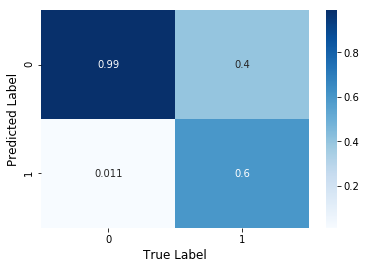

In [190]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [191]:
predicted_val_logi = logi.predict_proba(test)[:, 1]
winner_lg = pd.concat([BB_Kannada_participants, pd.DataFrame(predicted_val_logi, columns=['Predicted_Winner'])],axis=1)
winner_lg.sort_values('Predicted_Winner',ascending=False)

,Name,Predicted_Winner
2,KP Aravind,0.006385
9,Vaishnavi Gowda,0.005398
6,Raghu Gowda,0.004559
7,Shamanth Gowda,0.003477
0,Divya Suresh,0.002257
1,Divya Uruduga Rajeev,0.001794
4,Nidhi Subbaiah,0.001587
8,Shubha Poonja,0.001587
5,Prashanth Sambargi,0.001097
11,Priyanka Thimmesh,0.001024


## Predicted Winner for Bigg Boss Kannada Season 8, as per Logistic Regression

In [192]:
# Predicted Winner for Bigg Boss Kannada Season 8, as per LogisticRegression
winner_lg.iloc[np.argwhere(winner_lg.Predicted_Winner == np.amax(winner_lg.Predicted_Winner)).flatten().tolist()]

,Name,Predicted_Winner
2,KP Aravind,0.006385


In [193]:
# RandomForest
rf = RandomForestClassifier(n_estimators=500, random_state=2021).fit(x_train, y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

In [194]:
predicted_val_rf = rf.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_rf > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 98.52943889883204
Accuracy Score - 98.46153846153847


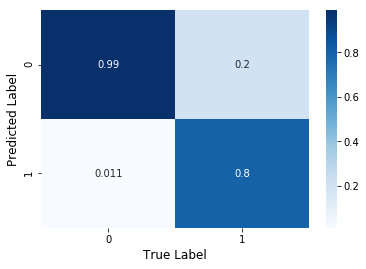

In [195]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [196]:
predicted_val_rf = rf.predict_proba(test)[:,1]
winner_rf = pd.concat([BB_Kannada_participants, pd.DataFrame(predicted_val_rf, columns=['Predicted_Winner'])],axis=1)
winner_rf.sort_values('Predicted_Winner',ascending=False)

,Name,Predicted_Winner
2,KP Aravind,0.028
7,Shamanth Gowda,0.020
0,Divya Suresh,0.012
5,Prashanth Sambargi,0.012
4,Nidhi Subbaiah,0.002
8,Shubha Poonja,0.002
1,Divya Uruduga Rajeev,0.000
3,Manju Pavagada,0.000
6,Raghu Gowda,0.000
9,Vaishnavi Gowda,0.000


## Predicted Winner for Bigg Boss Kannada Season 8, as per Random Forest

In [197]:
# Predicted Winner for Bigg Boss Kannada Season 8, as per RandomForest
winner_rf.iloc[np.argwhere(winner_rf.Predicted_Winner == np.amax(winner_rf.Predicted_Winner)).flatten().tolist()]

,Name,Predicted_Winner
2,KP Aravind,0.028


## Machine Learning Models to predict Indian Bigg Boss season Winners

## Telugu Bigg Boss Season4
## https://www.kaggle.com/thirumani/predicting-bigg-boss-telugu-season-4-winner

## Hindi Bigg Boss Season14
## https://www.kaggle.com/thirumani/predicting-bigg-boss-hindi-season-14-winner

## Malayalam Bigg Boss Season3
## https://www.kaggle.com/thirumani/predicting-bigg-boss-malayalam-season-3-winner

## Tamil Bigg Boss Season4
## https://www.kaggle.com/thirumani/predicting-bigg-boss-tamil-season-4-winner